<h5>This notebook solves problem 1.50 in <i> Classical Mechanics </i> by Taylor (edition 5) for a skateboard in a halfpipe (simple pendulum).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import *
from IPython.display import Image
from scipy.integrate import odeint, ode

The equation of motion for a simple pendulum is:

${\ddot \phi} = - \frac{g}{R}sin \phi $

Let 
$x = 
\begin{bmatrix}
\phi \\
\dot \phi
\end{bmatrix}
$

then 
$\dot x = 
\begin{bmatrix}
\dot\phi \\
\ddot \phi
\end{bmatrix}
=
\begin{bmatrix}
\dot\phi \\
- \frac{g}{R}sin \phi 
\end{bmatrix}
$

In [3]:
# set constants and define differentials

g = 9.82  # m/s^2
R = 5     # m 

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2 = x[0], x[1]
    
    dx1 = x[1]
    dx2 = -g/R*sin(x[0])
    
    return [dx1, dx2]

In [4]:
# [initial angle, initial angular velocity]
phi_0 = 20./180*pi

x0 = [phi_0, 0] 

In [5]:
# time coodinate to solve the ODE for: from 0 to 10 seconds

t = linspace(0, 10, 250)

In [6]:
# solve the ODE 

x = odeint(dx, x0, t)

In [7]:
# x = [phi(t), dphi(t)/dt ]

x.shape 

(250, 2)

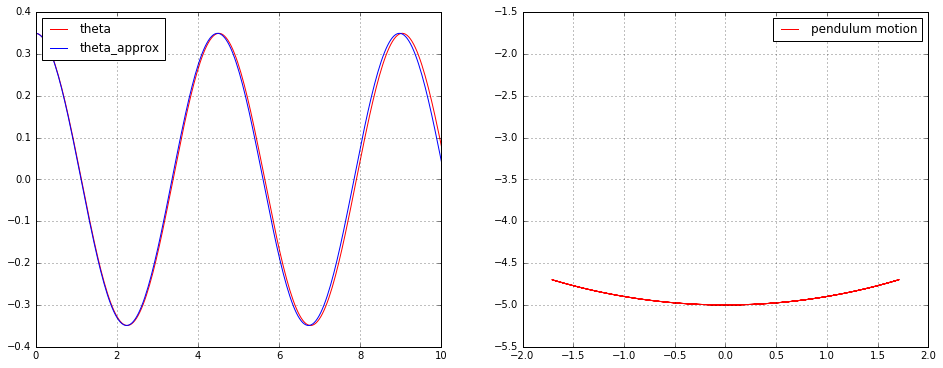

In [14]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].plot(t, x[:, 0], 'r', label="theta")
axes[0].plot(t, x0[0]*cos(sqrt(g/R)*t), 'b', label="theta_approx")
axes[0].legend(loc=2)
axes[0].grid()


x1 = + R * sin(x[:, 0])
y1 = - R * cos(x[:, 0])
axes[1].plot(x1, y1, 'r', label="pendulum motion")
axes[1].legend()
axes[1].set_ylim([-5.5, -1.5])
axes[1].set_xlim([-2, 2])
axes[1].grid()

In [15]:
# the remainder of this notebook shows a rough animation of the pendulum motion (I will upload a better version of
# the animation soon)

from IPython.display import display, clear_output
import time

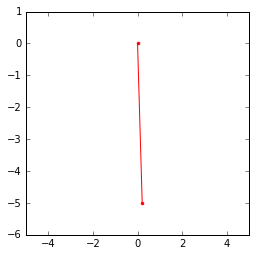

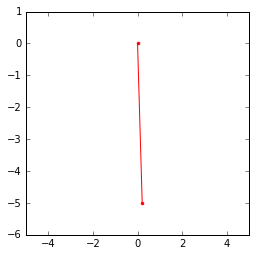

In [16]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + R * sin(x[t_idx, 0])
    y1 = - R * cos(x[t_idx, 0])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.set_ylim([-6, 1])
    ax.set_xlim([-5, 5])

    clear_output() 
    display(fig)

    time.sleep(0.1)

In [34]:
# find how long it takes for pendulum to come back to initial position (question from example 1.2)

tol = phi_0/10**3
x_init_mask = x[:,0] > phi_0 - tol
print "x value: ",x[x_init_mask,0][1]/pi*180, ' degrees'
print "t value: ",t[x_init_mask][1], ' seconds elapsed from t=0'

x value:  19.9924492598  degrees
t value:  4.49799196787  seconds elapsed from t=0
